In [15]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt

# --- Parameters ---
l = 6               # Eigenvalue index
m = 0               # Spherical harmonic order
lambda_l = l * (l + 1)

# --- Grid on the sphere ---
n_theta, n_phi = 2000, 4000 
theta = np.linspace(1e-7, np.pi - 1e-7, n_theta)  # Avoid poles
phi = np.linspace(0, 2 * np.pi, n_phi)
Theta, Phi = np.meshgrid(theta, phi)

# --- Area element on the sphere ---
dtheta = theta[1] - theta[0]
dphi = phi[1] - phi[0]
dOmega = np.sin(Theta) * dtheta * dphi


# --- Spherical harmonic (real-valued) ---
Y_lm = sph_harm(m, l, Phi, Theta).real
f_l = Y_lm

# --- Density function ρ(x) ---
rho = np.ones_like(f_l)
#rho = np.exp(np.cos(Theta))  # Example: non-uniform density
rho = rho / np.sum(rho * dOmega)  # Normalize so ∫_M rho dx = 1

# --- Normalize f_l so that ∫ f_l^2 * ρ = 1 ---
norm_factor = np.sqrt(np.sum(f_l**2 * rho * dOmega))
f_l = f_l / norm_factor

# --- Compute gradients of f_l ---
df_dtheta = np.gradient(f_l, dtheta, axis=1)
df_dphi = np.gradient(f_l, dphi, axis=0)
grad_f_squared = df_dtheta**2 + (1 / np.sin(Theta))**2 * df_dphi**2

# --- Compute sigma_eta from the constraint ---
numerator = 2 * lambda_l  # Since ∫ f_l^2 * rho = 1
denominator = np.sum(grad_f_squared * rho**2 * dOmega)
sigma_eta = numerator / denominator

# --- Compute the discrepancy integral ---
check = lambda_l + lambda_l * f_l**2 - sigma_eta * grad_f_squared * rho
discrepancy = np.sum(check**2 * rho * dOmega)

# --- Print results ---
print(f"Computed σ_eta: {sigma_eta:.6f}")
print(f"Discrepancy integral: {discrepancy:.3f}")


Computed σ_eta: 25.139699
Discrepancy integral: 10429.088


In [16]:
Ylm

NameError: name 'Ylm' is not defined

In [17]:
print(f"Computed σ_eta: {sigma_eta:.6f}")
print(f"Discrepancy integral: {discrepancy:.3f}")

Computed σ_eta: 25.139699
Discrepancy integral: 10429.088


## Compute the covariance matrix. Visualize using heat map.

In [18]:
# Try first compute the individual covariance
import numpy as np
from scipy.special import sph_harm

# --- Parameters ---
l, m = 6, 0  # First eigenfunction indices
k, n = 5, 0  # Second eigenfunction indices (can change as needed)

lambda_l = l * (l + 1)
lambda_k = k * (k + 1)

# --- Grid on the sphere ---
n_theta, n_phi = 2000, 4000
theta = np.linspace(1e-7, np.pi - 1e-7, n_theta)
phi = np.linspace(0, 2 * np.pi, n_phi)
Theta, Phi = np.meshgrid(theta, phi)

# --- Area element on the sphere ---
dtheta = theta[1] - theta[0]
dphi = phi[1] - phi[0]
dOmega = np.sin(Theta) * dtheta * dphi

# --- Real-valued spherical harmonics ---
f_l = sph_harm(m, l, Phi, Theta).real
f_k = sph_harm(n, k, Phi, Theta).real

# --- Density function ρ(x) (uniform here, can modify) ---
rho = np.ones_like(f_l)
rho /= np.sum(rho * dOmega)  # Normalize density

# --- Normalize f_l and f_k ---
norm_f_l = np.sqrt(np.sum(f_l**2 * rho * dOmega))
norm_f_k = np.sqrt(np.sum(f_k**2 * rho * dOmega))

f_l /= norm_f_l
f_k /= norm_f_k

# --- Compute gradients ---
df_l_dtheta = np.gradient(f_l, dtheta, axis=1)
df_l_dphi = np.gradient(f_l, dphi, axis=0)
grad_f_l_squared = df_l_dtheta**2 + (1 / np.sin(Theta))**2 * df_l_dphi**2


df_k_dtheta = np.gradient(f_k, dtheta, axis=1)
df_k_dphi = np.gradient(f_k, dphi, axis=0)
grad_f_k_squared = df_k_dtheta**2 + (1 / np.sin(Theta))**2 * df_k_dphi**2

# --- Compute sigma_eta for both eigenfunctions ---
sigma_eta_l = (2 * lambda_l) / np.sum(grad_f_l_squared * rho**2 * dOmega)
sigma_eta_k = (2 * lambda_k) / np.sum(grad_f_k_squared * rho**2 * dOmega)

# --- Compute the covariance integral ---
term_l = (f_l**2 * rho + lambda_l - 2 * grad_f_l_squared * rho**2)
term_k = (f_k**2 * rho + lambda_k - 2 * grad_f_k_squared * rho**2)

covariance = np.sum(term_l * term_k * rho * dOmega)

# --- Print results ---
print(f"Covariance between λ_{l} and λ_{k}: {covariance:.6f}")

Covariance between λ_6 and λ_5: 1234.049952


C:\Users\95889\AppData\Local\Temp\ipykernel_105092\2261016904.py:60: RuntimeWarning: invalid value encountered in scalar divide
  sigma_eta = numerator / denominator


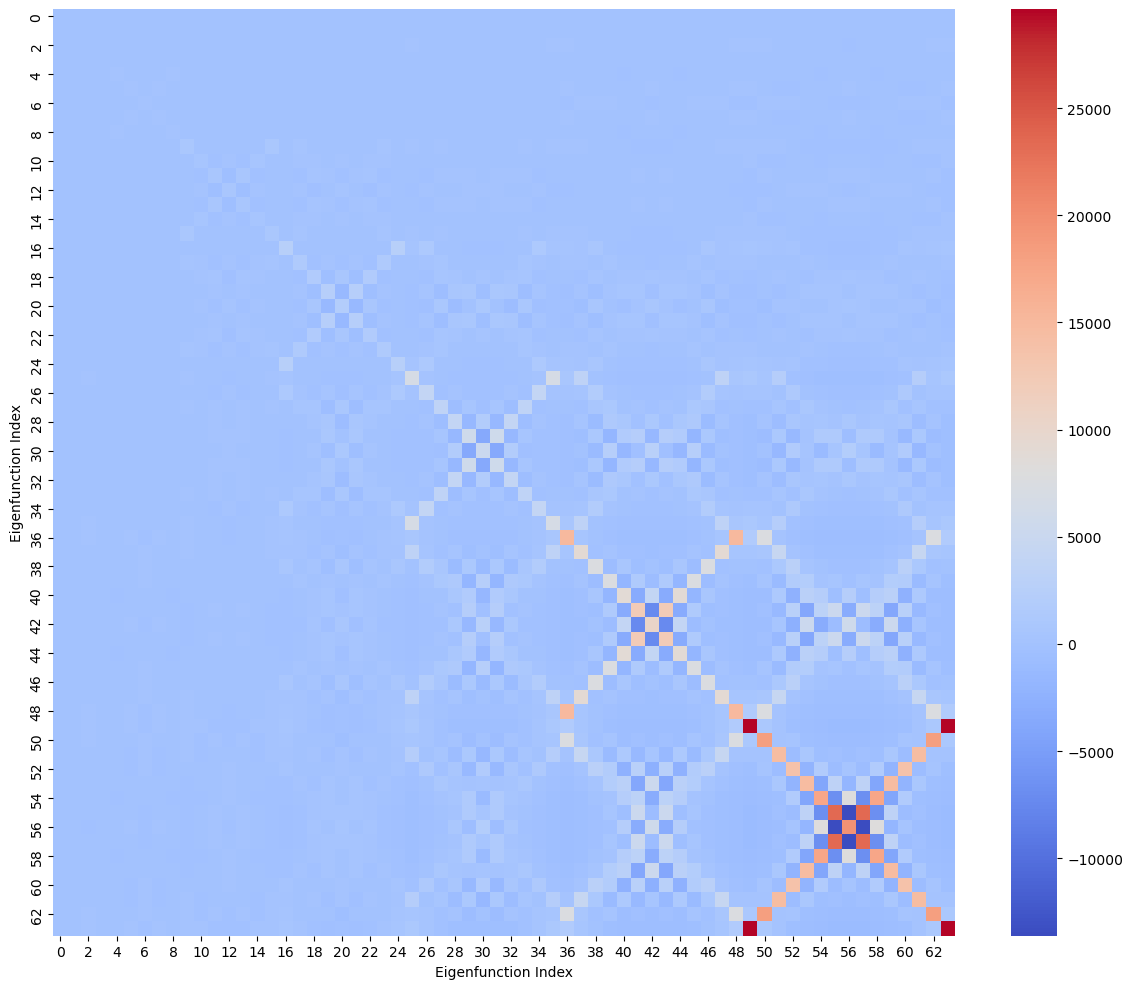

In [19]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
import seaborn as sns

# --- Parameters ---
eigen_indices = [(0, 0),
                 (1, -1), (1, 0), (1, 1),
                 (2, -2), (2, -1), (2, 0), (2, 1), (2, 2),
                 (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3),
                 (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4),
                 (5, -5), (5, -4), (5, -3), (5, -2), (5, -1), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5),
                 (6, -6), (6, -5), (6, -4), (6, -3), (6, -2), (6, -1), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6),
                 (7, -7), (7, -6), (7, -5), (7, -4), (7, -3), (7, -2), (7, -1), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
num_eigenvalues = len(eigen_indices)

# --- Grid on the sphere ---
n_theta, n_phi = 100, 2000 # 500, 1000
theta = np.linspace(1e-7, np.pi - 1e-7, n_theta)
phi = np.linspace(0, 2 * np.pi, n_phi)
Theta, Phi = np.meshgrid(theta, phi)

# --- Area element on the sphere ---
dtheta = theta[1] - theta[0]
dphi = phi[1] - phi[0]
dOmega = np.sin(Theta) * dtheta * dphi

# --- Density function ρ(x) (uniform here, can modify) ---
rho = np.ones_like(Theta)
rho /= np.sum(rho * dOmega)

# --- Initialize storage ---
f_list = []
grad_f_squared_list = []
lambda_list = []

for l, m in eigen_indices:
    lambda_l = l * (l + 1)
    lambda_list.append(lambda_l)

    # Compute spherical harmonics
    f_l = sph_harm(m, l, Phi, Theta).real

    # Normalize f_l
    norm_f_l = np.sqrt(np.sum(f_l**2 * rho * dOmega))
    f_l /= norm_f_l
    f_list.append(f_l)

    # Compute gradient
    df_l_dtheta = np.gradient(f_l, dtheta, axis=1)
    df_l_dphi = np.gradient(f_l, dphi, axis=0)
    grad_f_l_squared = df_l_dtheta**2 + (1 / np.sin(Theta))**2 * df_l_dphi**2
    grad_f_squared_list.append(grad_f_l_squared)

# --- Compute sigma_eta for each eigenfunction ---
sigma_eta_list = []
for i in range(num_eigenvalues):
    numerator = 2 * lambda_list[i]
    denominator = np.sum(grad_f_squared_list[i] * rho**2 * dOmega)
    sigma_eta = numerator / denominator
    sigma_eta_list.append(sigma_eta)

sigma_eta_list[0]=0

# --- Compute variance-covariance matrix ---
variance_matrix = np.zeros((num_eigenvalues, num_eigenvalues))

for i in range(num_eigenvalues):
    for j in range(num_eigenvalues):
        term_i = lambda_list[i] + lambda_list[i] * f_list[i]**2 - sigma_eta_list[i] * grad_f_squared_list[i] * rho
        term_j = lambda_list[j] + lambda_list[j] * f_list[j]**2 - sigma_eta_list[j] * grad_f_squared_list[j] * rho

        variance_matrix[i, j] = np.sum(term_i * term_j * rho * dOmega)

# --- Generate heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(variance_matrix, cmap="coolwarm")
#plt.title("Variance-Covariance Matrix Heatmap")
plt.xlabel("Eigenfunction Index")
plt.ylabel("Eigenfunction Index")
plt.tight_layout()
plt.show()


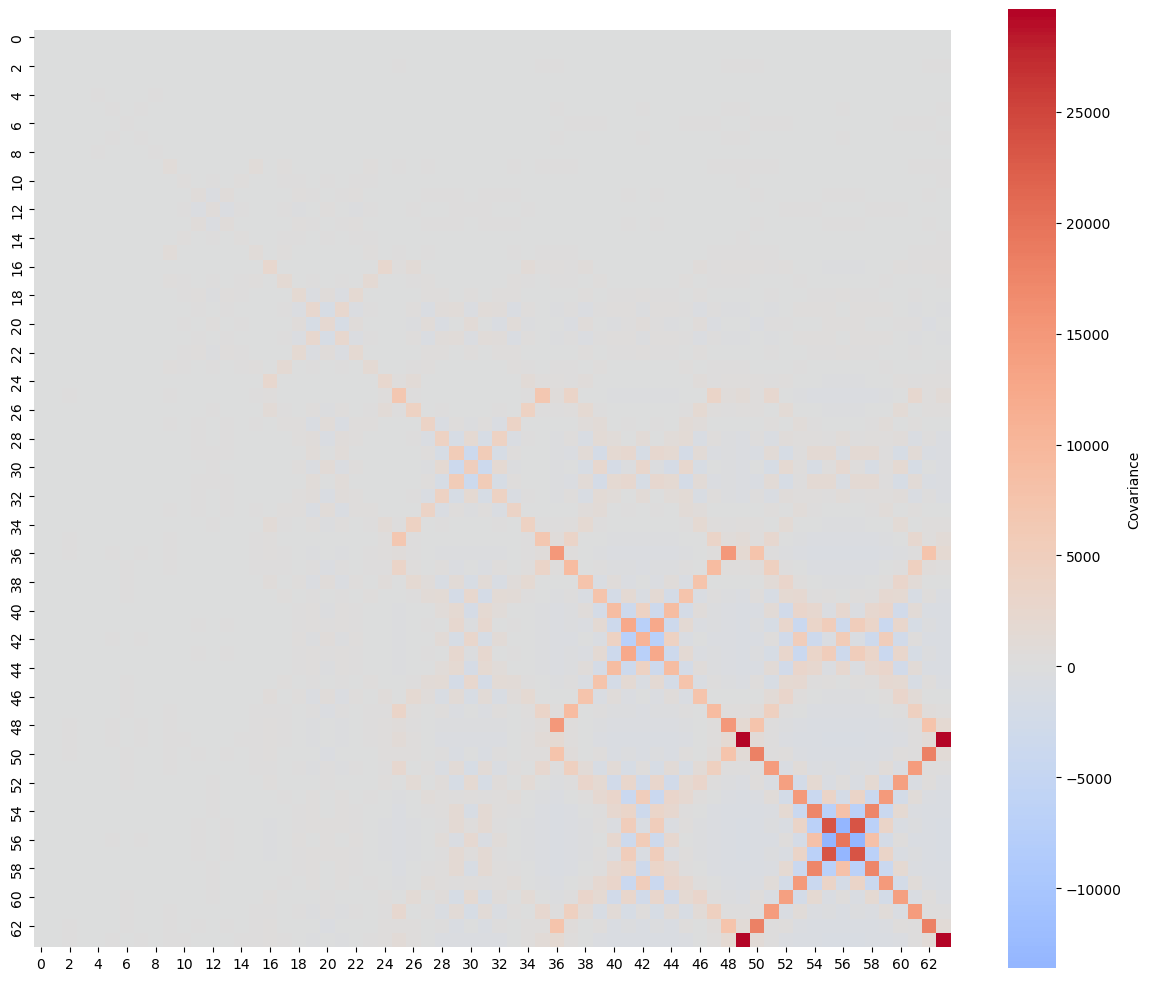

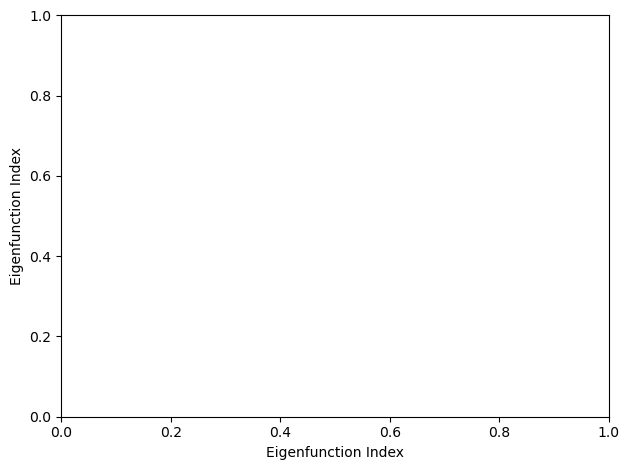

In [13]:
max_val = np.nanmax(variance_matrix)
min_val = np.nanmin(variance_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(
    variance_matrix,
    cmap="coolwarm",
    vmin=min_val,      # force symmetric limits
    vmax=max_val,
    center=0,           # white at zero
    square=True,
    cbar_kws={"label": "Covariance"}
)
plt.tight_layout()
plt.show()

#plt.title("Variance-Covariance Matrix Heatmap")
plt.xlabel("Eigenfunction Index")
plt.ylabel("Eigenfunction Index")
plt.tight_layout()
plt.show()

C:\Users\95889\AppData\Local\Temp\ipykernel_105092\2574586388.py:63: RuntimeWarning: invalid value encountered in scalar divide
  sigma_eta_list.append(num / den)


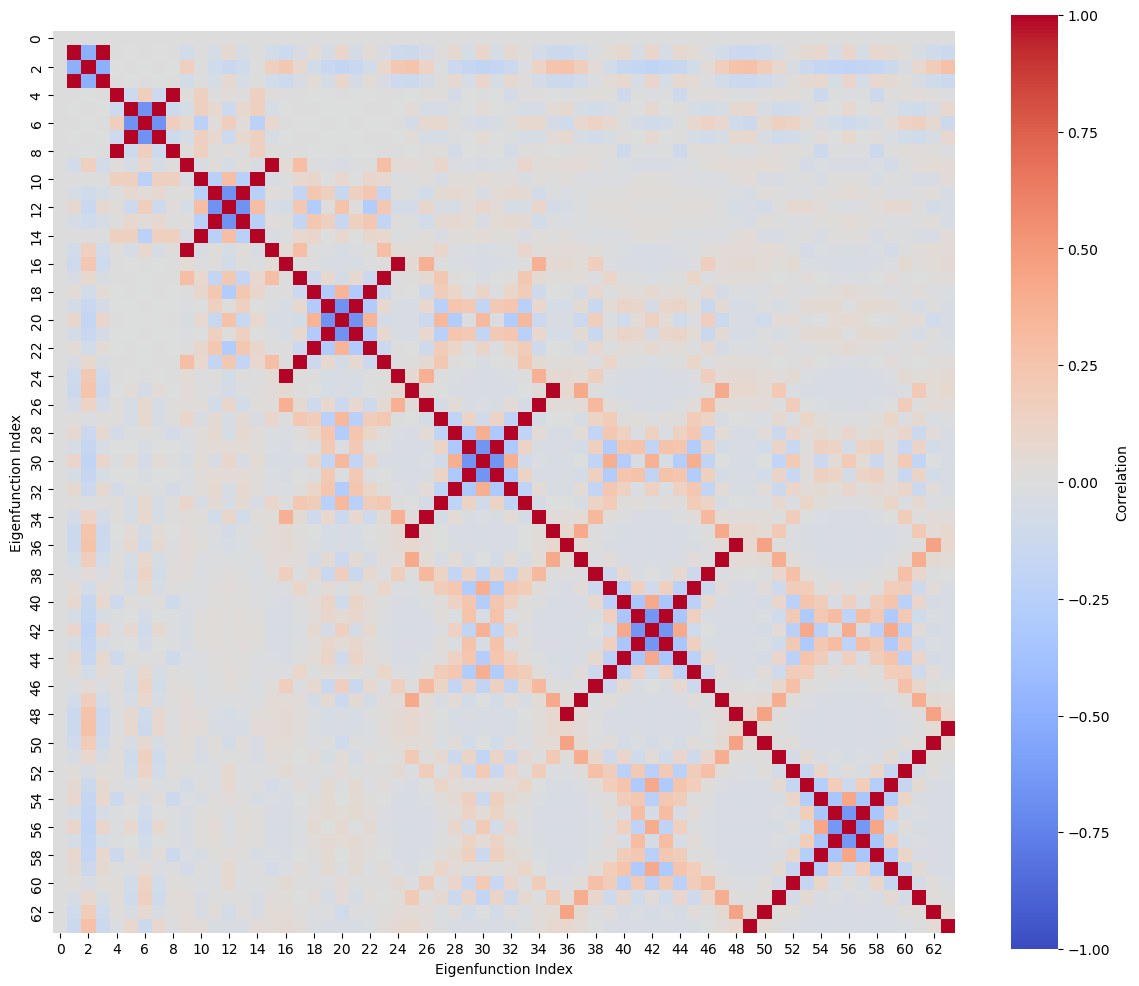

In [14]:
# Correlation plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import sph_harm

# --- Eigen‐index list ---
eigen_indices = [
    (0, 0),
    (1, -1), (1, 0), (1, 1),
    (2, -2), (2, -1), (2, 0), (2, 1), (2, 2),
    (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3),
    (4, -4), (4, -3), (4, -2), (4, -1), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4),
    (5, -5), (5, -4), (5, -3), (5, -2), (5, -1), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5),
    (6, -6), (6, -5), (6, -4), (6, -3), (6, -2), (6, -1), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6),
    (7, -7), (7, -6), (7, -5), (7, -4), (7, -3), (7, -2), (7, -1), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)
]
num_eigen = len(eigen_indices)

# --- Grid on the sphere ---
n_theta, n_phi = 500, 1000
theta = np.linspace(1e-7, np.pi - 1e-7, n_theta)
phi   = np.linspace(0, 2 * np.pi, n_phi)
Theta, Phi = np.meshgrid(theta, phi)

# --- Area element ---
dtheta = theta[1] - theta[0]
dphi   = phi[1]   - phi[0]
dOmega = np.sin(Theta) * dtheta * dphi

# --- Uniform density ρ ---
rho = np.ones_like(Theta)
rho /= np.sum(rho * dOmega)

# --- Storage for eigenfunctions, gradients, eigenvalues ---
f_list             = []
grad_f2_list       = []
lambda_list        = []

for ℓ, m in eigen_indices:
    λ = ℓ*(ℓ+1)
    lambda_list.append(λ)

    # spherical harmonic (real part)
    f = sph_harm(m, ℓ, Phi, Theta).real

    # normalize
    norm = np.sqrt(np.sum(f**2 * rho * dOmega))
    f   = f / norm
    f_list.append(f)

    # gradients
    df_dθ = np.gradient(f, dtheta, axis=1)
    df_dφ = np.gradient(f, dphi,   axis=0)
    grad2 = df_dθ**2 + (1/np.sin(Theta))**2 * df_dφ**2
    grad_f2_list.append(grad2)

# --- Compute sigma_eta ---
sigma_eta_list = []
for i in range(num_eigen):
    num = 2 * lambda_list[i]
    den = np.sum(grad_f2_list[i] * rho**2 * dOmega)
    sigma_eta_list.append(num / den)

# --- Variance‐covariance matrix ---
variance_matrix = np.zeros((num_eigen, num_eigen))
for i in range(num_eigen):
    term_i = (lambda_list[i]
              + lambda_list[i]*f_list[i]**2
              - sigma_eta_list[i]*grad_f2_list[i]*rho)
    for j in range(num_eigen):
        term_j = (lambda_list[j]
                  + lambda_list[j]*f_list[j]**2
                  - sigma_eta_list[j]*grad_f2_list[j]*rho)
        variance_matrix[i, j] = np.sum(term_i * term_j * rho * dOmega)

# --- Convert to correlation matrix ---
stds = np.sqrt(np.diag(variance_matrix))
denom = np.outer(stds, stds)
correlation_matrix = variance_matrix / denom
np.fill_diagonal(correlation_matrix, 1.0)
for i in range(1,num_eigen):
    correlation_matrix[0,i] = 0.0
    correlation_matrix[i,0] = 0.0
correlation_matrix[0,0] = 0.0
# --- Plot correlation heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    cbar_kws={"label": "Correlation"}
)
plt.xlabel("Eigenfunction Index")
plt.ylabel("Eigenfunction Index")
#plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


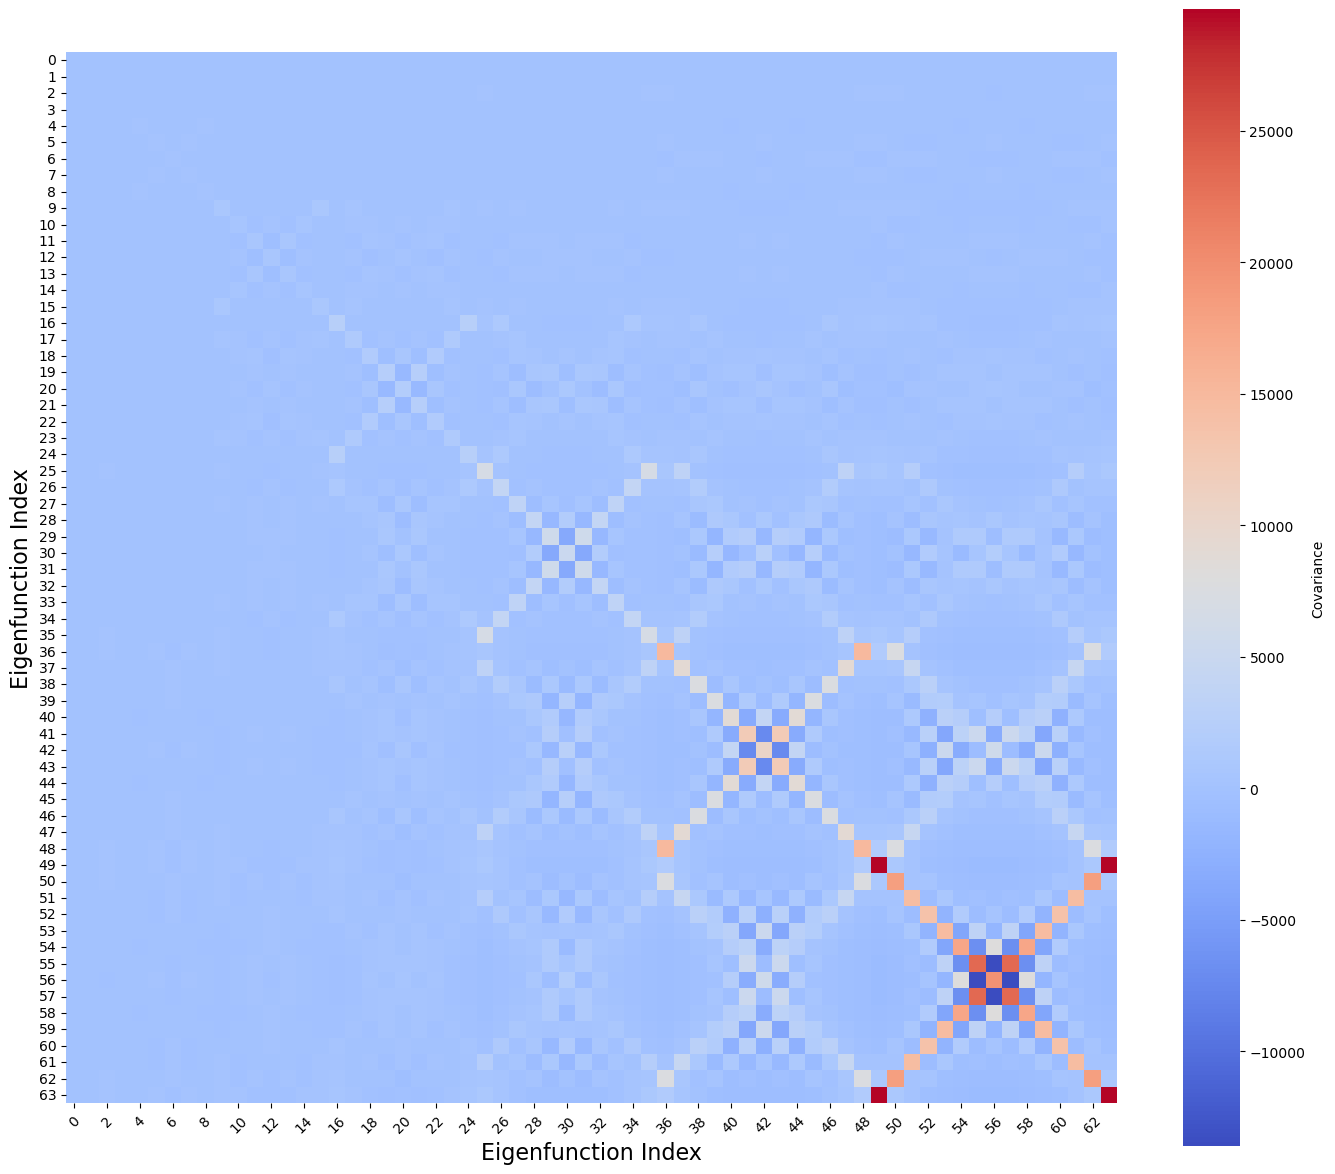

In [12]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    variance_matrix,
    cmap="coolwarm",
    annot=False,
    cbar_kws={'label': 'Covariance'},
    square=True
)
#plt.title("Variance-Covariance Matrix Heatmap", fontsize=20)
plt.xlabel("Eigenfunction Index", fontsize=16)
plt.ylabel("Eigenfunction Index", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


# Compute the rotation matrix to the eigenfunction and then compute the covariance matrix

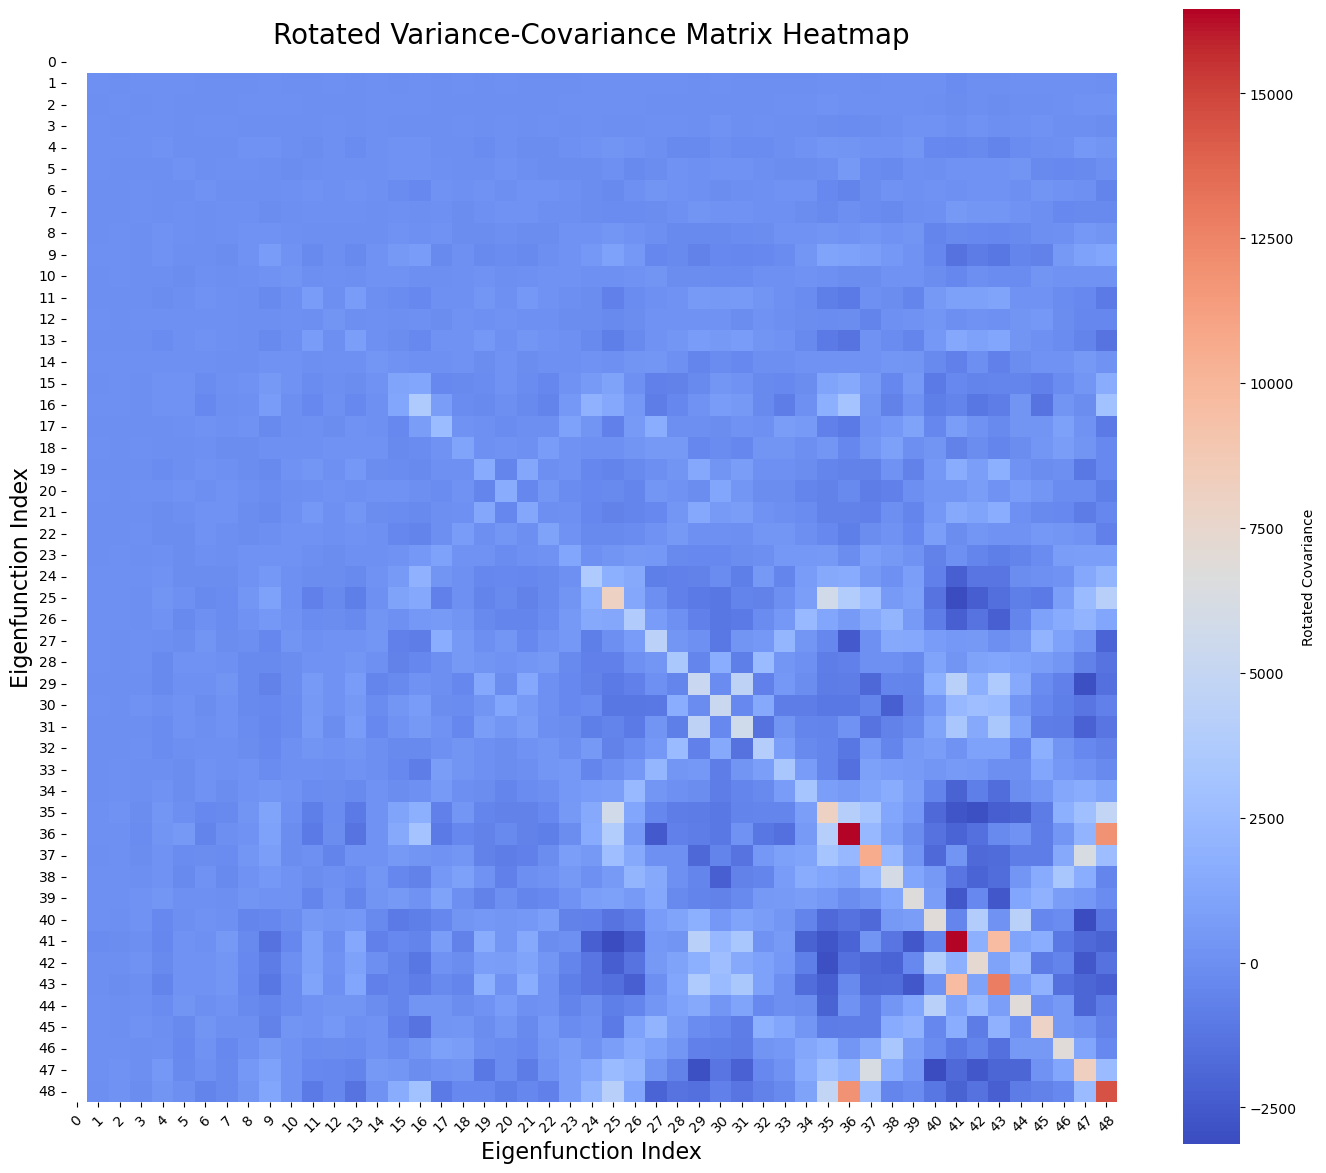

In [32]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
import seaborn as sns

# [Code unchanged up to original covariance matrix computation]

# --- Perform rotation within eigenfunctions of the same eigenvalue ---
rotated_f_list = f_list.copy()

current_index = 0
for l in range(0, 7):  # l from 0 to 6 (based on eigen_indices)
    multiplicity = 2 * l + 1
    if multiplicity == 1:
        current_index += multiplicity
        continue

    # Extract subset
    subset_f = f_list[current_index:current_index + multiplicity]
    subset_f_matrix = np.array([f.flatten() for f in subset_f])

    # Generate random orthogonal rotation matrix
    rotation_matrix, _ = np.linalg.qr(np.random.randn(multiplicity, multiplicity))

    # Rotate subset
    rotated_subset_f_matrix = rotation_matrix @ subset_f_matrix

    # Reshape back and store rotated eigenfunctions
    for i in range(multiplicity):
        rotated_f_list[current_index + i] = rotated_subset_f_matrix[i].reshape(Theta.shape)

    current_index += multiplicity

# --- Recompute variance-covariance matrix with rotated eigenfunctions ---
rotated_variance_matrix = np.zeros((num_eigenvalues, num_eigenvalues))

for i in range(num_eigenvalues):
    for j in range(num_eigenvalues):
        term_i = lambda_list[i] + lambda_list[i] * rotated_f_list[i]**2 - sigma_eta_list[i] * grad_f_squared_list[i] * rho
        term_j = lambda_list[j] + lambda_list[j] * rotated_f_list[j]**2 - sigma_eta_list[j] * grad_f_squared_list[j] * rho

        rotated_variance_matrix[i, j] = np.sum(term_i * term_j * rho * dOmega)

# --- Generate heatmap for rotated covariance matrix ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    rotated_variance_matrix,
    cmap="coolwarm",
    annot=False,
    cbar_kws={'label': 'Rotated Covariance'},
    square=True
)
plt.title("Rotated Variance-Covariance Matrix Heatmap", fontsize=20)
plt.xlabel("Eigenfunction Index", fontsize=16)
plt.ylabel("Eigenfunction Index", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


Block sums by eigenvalue:
l =  0 (multiplicity  1): block sum = nan
l =  1 (multiplicity  3): block sum = 38.419221
l =  2 (multiplicity  5): block sum = 880.173823
l =  3 (multiplicity  7): block sum = 6030.085215
l =  4 (multiplicity  9): block sum = 24453.030795
l =  5 (multiplicity 11): block sum = 73611.995373
l =  6 (multiplicity 13): block sum = 182718.978193

Variance sums by eigenvalue:
l =  0 (multiplicity  1): variance sum = nan
l =  1 (multiplicity  3): variance sum = 26.402774
l =  2 (multiplicity  5): variance sum = 686.224247
l =  3 (multiplicity  7): variance sum = 4150.632841
l =  4 (multiplicity  9): variance sum = 17673.741230
l =  5 (multiplicity 11): variance sum = 54401.703802
l =  6 (multiplicity 13): variance sum = 127684.729610


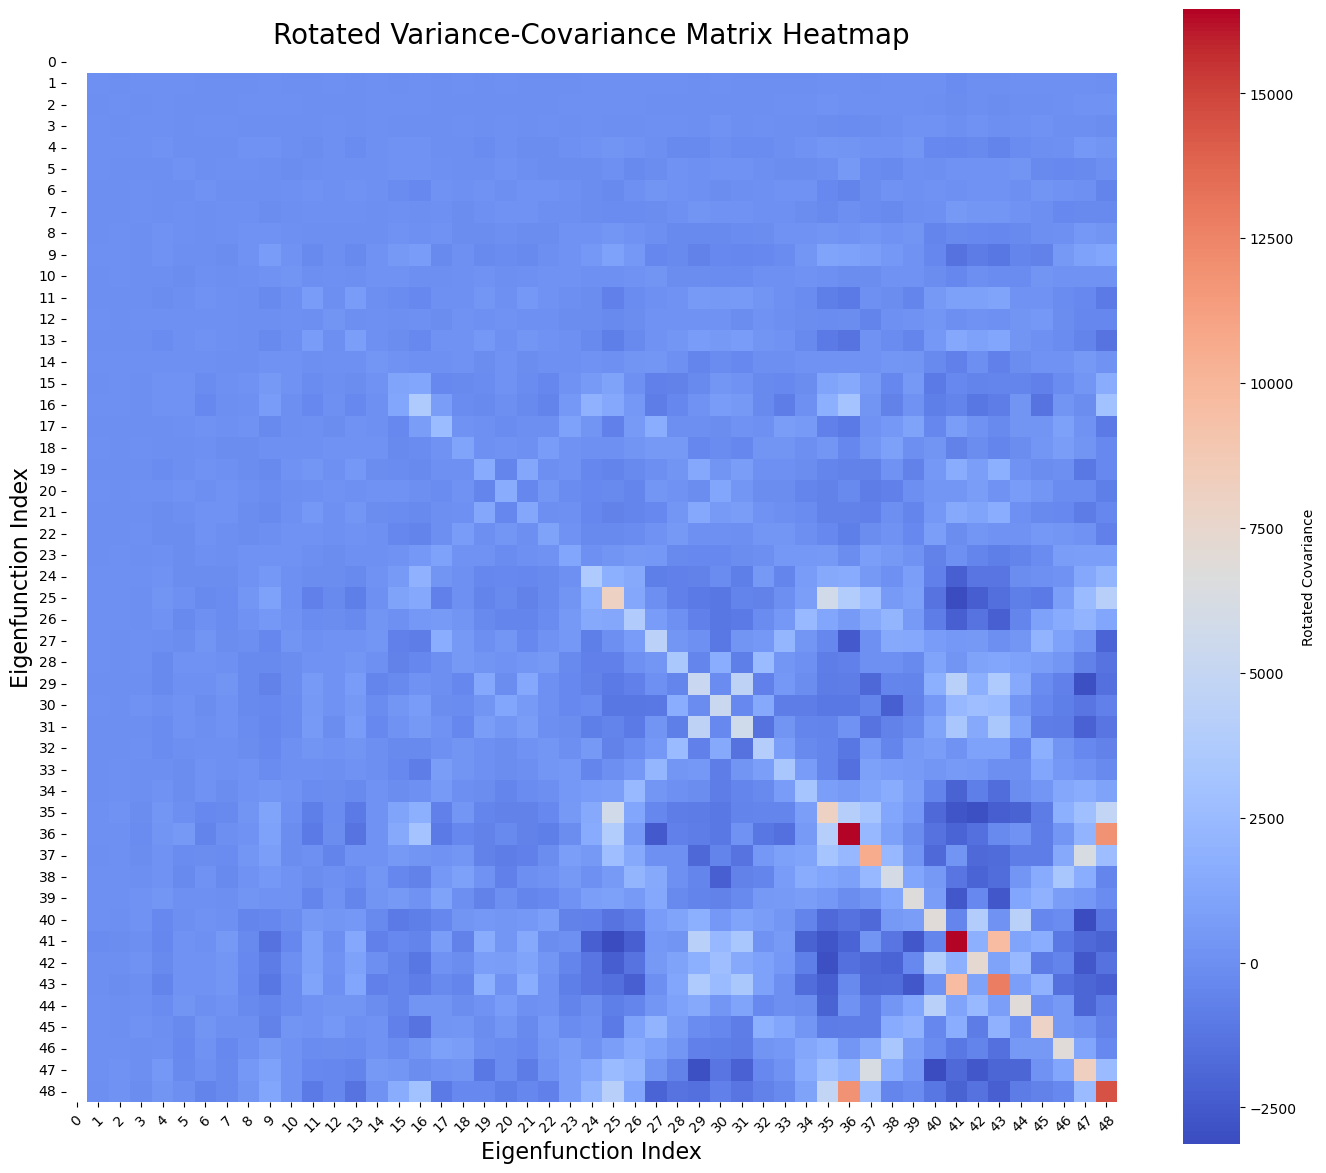

In [34]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
import seaborn as sns

# [Code unchanged up to rotated_variance_matrix]

# --- Check block sums within each eigenvalue block ---
current_index = 0
block_sums = []
for l in range(0, 7):  # l from 0 to 6
    multiplicity = 2 * l + 1
    block = rotated_variance_matrix[current_index:current_index + multiplicity, current_index:current_index + multiplicity]
    block_sum = np.sum(block)
    block_sums.append((l, multiplicity, block_sum))
    current_index += multiplicity

print("Block sums by eigenvalue:")
for l, multiplicity, block_sum in block_sums:
    print(f"l = {l:2d} (multiplicity {multiplicity:2d}): block sum = {block_sum:.6f}")

# --- Also sum diagonals within blocks ---
current_index = 0
variance_sums = []
for l in range(0, 7):
    multiplicity = 2 * l + 1
    block_diag = np.diag(rotated_variance_matrix[current_index:current_index + multiplicity, current_index:current_index + multiplicity])
    variance_sum = np.sum(block_diag)
    variance_sums.append((l, multiplicity, variance_sum))
    current_index += multiplicity

print("\nVariance sums by eigenvalue:")
for l, multiplicity, variance_sum in variance_sums:
    print(f"l = {l:2d} (multiplicity {multiplicity:2d}): variance sum = {variance_sum:.6f}")

# --- Plot heatmap remains unchanged ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    rotated_variance_matrix,
    cmap="coolwarm",
    annot=False,
    cbar_kws={'label': 'Rotated Covariance'},
    square=True
)
plt.title("Rotated Variance-Covariance Matrix Heatmap", fontsize=20)
plt.xlabel("Eigenfunction Index", fontsize=16)
plt.ylabel("Eigenfunction Index", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


Block sums by eigenvalue:
l =  0 (multiplicity  1): block sum = nan
l =  1 (multiplicity  3): block sum = 38.419221
l =  2 (multiplicity  5): block sum = 880.173823
l =  3 (multiplicity  7): block sum = 6030.085215
l =  4 (multiplicity  9): block sum = 24453.030795
l =  5 (multiplicity 11): block sum = 73611.995373
l =  6 (multiplicity 13): block sum = 182718.978193

Variance sums by eigenvalue:
l =  0 (multiplicity  1): variance sum = nan
l =  1 (multiplicity  3): variance sum = 26.402774
l =  2 (multiplicity  5): variance sum = 686.224247
l =  3 (multiplicity  7): variance sum = 4150.632841
l =  4 (multiplicity  9): variance sum = 17673.741230
l =  5 (multiplicity 11): variance sum = 54401.703802
l =  6 (multiplicity 13): variance sum = 127684.729610


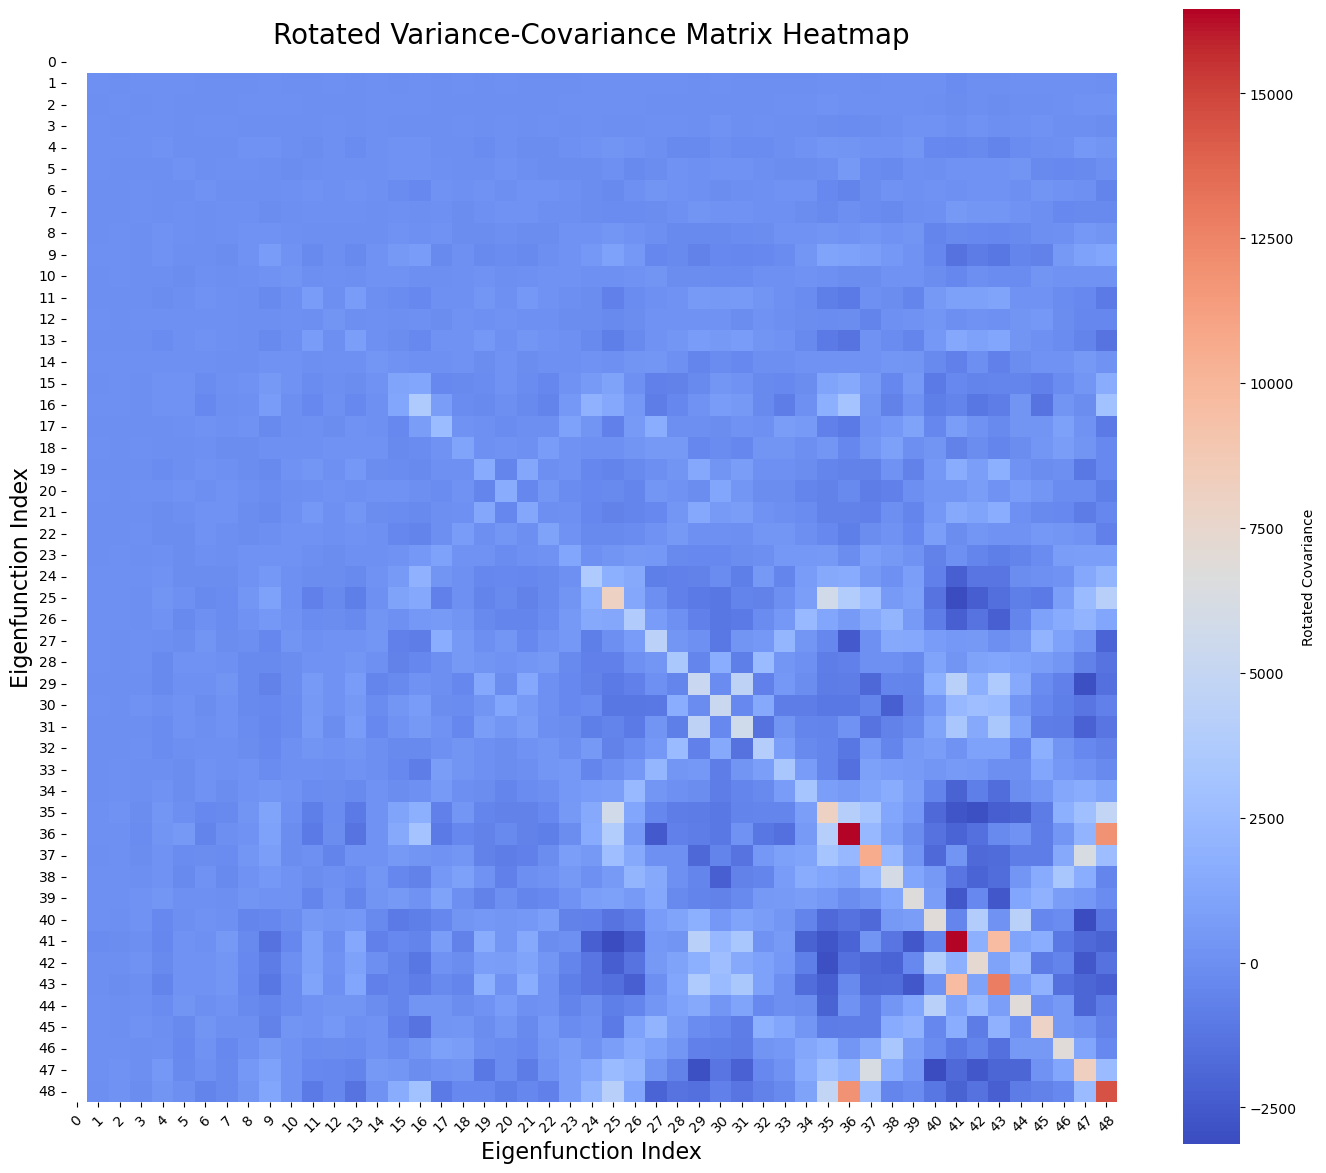

In [35]:
import numpy as np
from scipy.special import sph_harm
import matplotlib.pyplot as plt
import seaborn as sns

# [Code unchanged up to rotated_variance_matrix]

# --- Check block sums within each eigenvalue block ---
current_index = 0
block_sums = []
for l in range(0, 7):  # l from 0 to 6
    multiplicity = 2 * l + 1
    block = rotated_variance_matrix[current_index:current_index + multiplicity, current_index:current_index + multiplicity]
    block_sum = np.sum(block)
    block_sums.append((l, multiplicity, block_sum))
    current_index += multiplicity

print("Block sums by eigenvalue:")
for l, multiplicity, block_sum in block_sums:
    print(f"l = {l:2d} (multiplicity {multiplicity:2d}): block sum = {block_sum:.6f}")

# --- Also sum diagonals within blocks ---
current_index = 0
variance_sums = []
for l in range(0, 7):
    multiplicity = 2 * l + 1
    block_diag = np.diag(rotated_variance_matrix[current_index:current_index + multiplicity, current_index:current_index + multiplicity])
    variance_sum = np.sum(block_diag)
    variance_sums.append((l, multiplicity, variance_sum))
    current_index += multiplicity

print("\nVariance sums by eigenvalue:")
for l, multiplicity, variance_sum in variance_sums:
    print(f"l = {l:2d} (multiplicity {multiplicity:2d}): variance sum = {variance_sum:.6f}")

# --- Plot heatmap remains unchanged ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    rotated_variance_matrix,
    cmap="coolwarm",
    annot=False,
    cbar_kws={'label': 'Rotated Covariance'},
    square=True
)
plt.title("Rotated Variance-Covariance Matrix Heatmap", fontsize=20)
plt.xlabel("Eigenfunction Index", fontsize=16)
plt.ylabel("Eigenfunction Index", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


c:\Users\95889\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


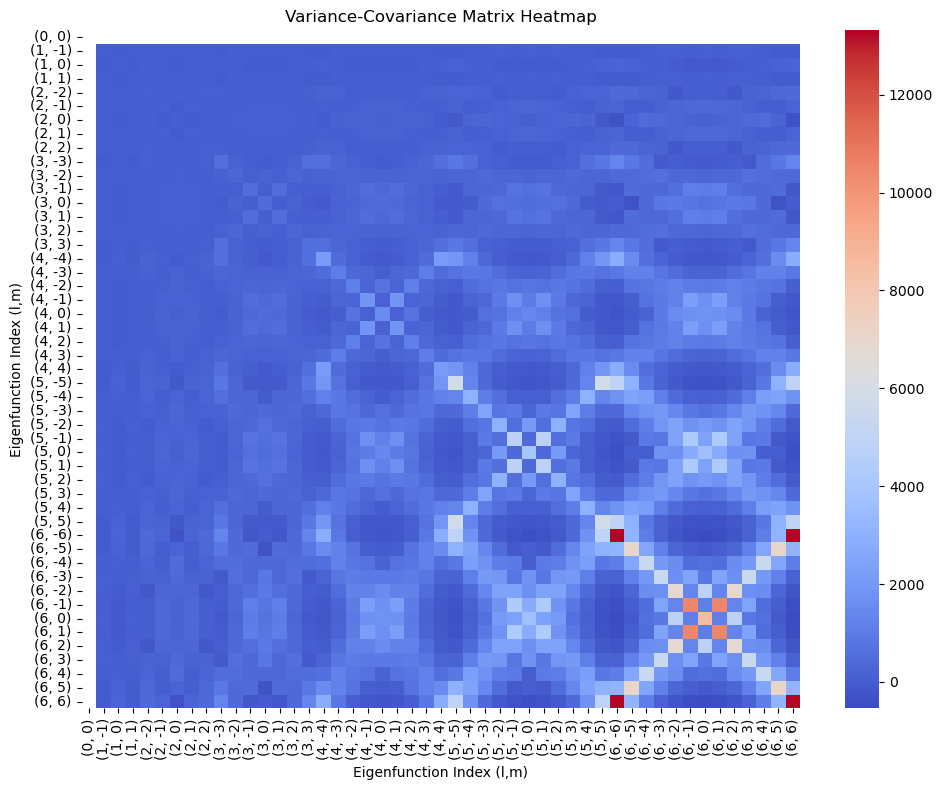

In [22]:
# --- Generate heatmap ---
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(variance_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=eigen_indices, yticklabels=eigen_indices)
plt.title("Variance-Covariance Matrix Heatmap")
plt.xlabel("Eigenfunction Index (l,m)")
plt.ylabel("Eigenfunction Index (l,m)")
plt.tight_layout()
plt.show()


## The above is the computation for uniform density case such that the eigenbasis is known. We compute the discrepancy using eigenfunction.

In [80]:
check = lambda_l + lambda_l * f_l**2 - sigma_eta * grad_f_squared * rho
np.sum(check *rho * dOmega)

np.float64(-3.3306690738754696e-15)

In [81]:
lhs = lambda_l * np.sum(f_l**2 * rho * dOmega)
rhs = 0.5 * sigma_eta * np.sum(grad_f_squared * rho**2 * dOmega)
print("LHS:", lhs)
print("RHS:", rhs)

LHS: 20.0
RHS: 20.0


In [37]:
sigma_eta

np.float64(2.000038029954325)

In [34]:
dOmega

array([[9.87045659e-12, 4.08805363e-11, 7.18906120e-11, ...,
        7.18906120e-11, 4.08805363e-11, 9.87045659e-12],
       [9.87045659e-12, 4.08805363e-11, 7.18906120e-11, ...,
        7.18906120e-11, 4.08805363e-11, 9.87045659e-12],
       [9.87045659e-12, 4.08805363e-11, 7.18906120e-11, ...,
        7.18906120e-11, 4.08805363e-11, 9.87045659e-12],
       ...,
       [9.87045659e-12, 4.08805363e-11, 7.18906120e-11, ...,
        7.18906120e-11, 4.08805363e-11, 9.87045659e-12],
       [9.87045659e-12, 4.08805363e-11, 7.18906120e-11, ...,
        7.18906120e-11, 4.08805363e-11, 9.87045659e-12],
       [9.87045659e-12, 4.08805363e-11, 7.18906120e-11, ...,
        7.18906120e-11, 4.08805363e-11, 9.87045659e-12]])

## In the following, we try to use spectral method to compute f_l.

In [88]:
import numpy as np
from scipy.special import sph_harm
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Parameters
L_max = 5  # maximum degree of spherical harmonics
n_theta, n_phi = 100, 200  # resolution of sphere grid

# Create spherical grid
theta = np.linspace(1e-3, np.pi - 1e-3, n_theta)  # avoid poles
phi = np.linspace(0, 2 * np.pi, n_phi)
Theta, Phi = np.meshgrid(theta, phi, indexing='ij')

# Area element on the sphere
dtheta = theta[1] - theta[0]
dphi = phi[1] - phi[0]
dOmega = np.sin(Theta) * dtheta * dphi  # differential area element

# Define the density function rho(x)
rho = np.exp(np.cos(Theta))
rho = rho / np.sum(rho * dOmega)  # normalize to integrate to 1

# Generate real spherical harmonics basis functions up to degree L_max
Y_basis = []
lm_list = []
for l in range(L_max + 1):
    for m in range(-l, l + 1):
        Y_lm = sph_harm(m, l, Phi, Theta)
        if m < 0:
            Y_real = np.sqrt(2) * Y_lm.imag
        elif m > 0:
            Y_real = np.sqrt(2) * Y_lm.real
        else:
            Y_real = Y_lm.real
        Y_basis.append(Y_real)
        lm_list.append((l, m))

Y_basis = np.array(Y_basis)  # shape (n_basis, n_theta, n_phi)
n_basis = Y_basis.shape[0]

# Compute gradient of each basis function and build A and B matrices
A = np.zeros((n_basis, n_basis))
B = np.zeros((n_basis, n_basis))

for i in range(n_basis):
    f_i = Y_basis[i]
    df_i_theta = np.gradient(f_i, dtheta, axis=0)
    df_i_phi = np.gradient(f_i, dphi, axis=1)
    grad_i_sq = df_i_theta**2 + (1 / np.sin(Theta))**2 * df_i_phi**2

    for j in range(i, n_basis):
        f_j = Y_basis[j]
        df_j_theta = np.gradient(f_j, dtheta, axis=0)
        df_j_phi = np.gradient(f_j, dphi, axis=1)

        # Weighted Laplace-like action: div(rho^2 * grad f_j)
        grad_dot = df_j_theta * df_i_theta + (1 / np.sin(Theta))**2 * df_j_phi * df_i_phi
        A_ij = np.sum(grad_dot * rho**2 * dOmega)
        B_ij = np.sum(f_i * f_j * rho * dOmega)
        A[i, j] = A_ij
        B[i, j] = B_ij
        if i != j:
            A[j, i] = A_ij
            B[j, i] = B_ij

# Solve generalized eigenproblem
eigvals, eigvecs = eigh(A, B)

# Sort by eigenvalue
idx = np.argsort(eigvals)
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

eigvals[:10]  # return first 10 eigenvalues for inspection


array([0.        , 0.12131785, 0.16660163, 0.16837448, 0.36191787,
       0.37950911, 0.38243623, 0.39329153, 0.39865125, 0.73726724])

Visualize

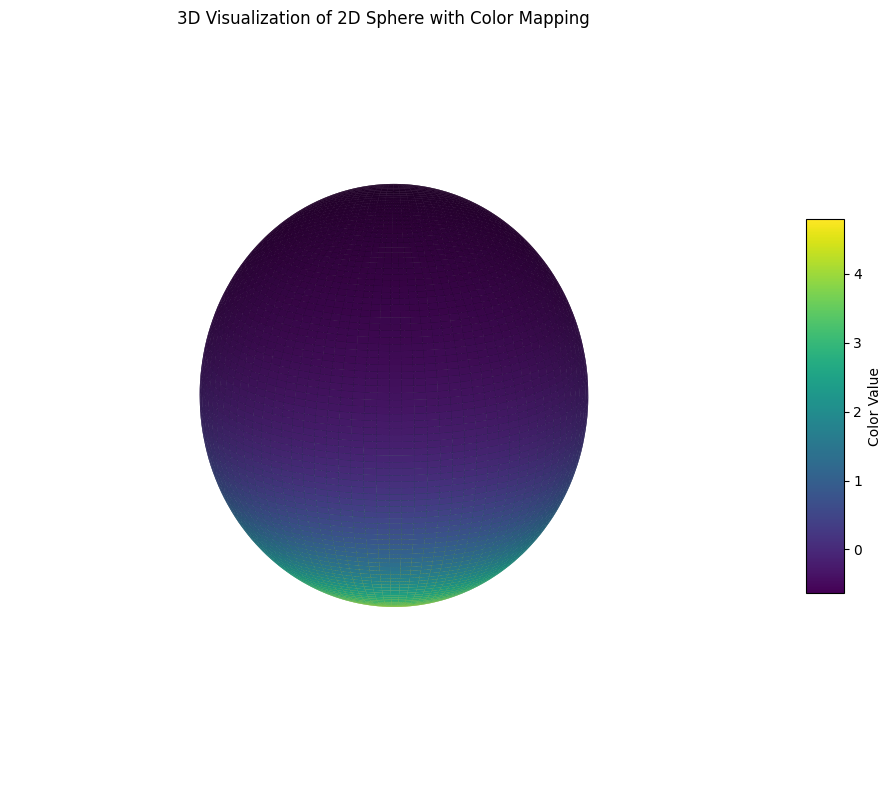

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.linalg import eigh
from mpl_toolkits.mplot3d import Axes3D

# Parameters
L = 5  # max degree of spherical harmonics
n_theta = 100
n_phi = 100
theta = np.linspace(1e-3, np.pi - 1e-3, n_theta)
phi = np.linspace(0, 2 * np.pi, n_phi)
Theta, Phi = np.meshgrid(theta, phi, indexing='ij')
dtheta = theta[1] - theta[0]
dphi = phi[1] - phi[0]
dOmega = np.sin(Theta) * dtheta * dphi

# Define the density rho
rho = np.exp(np.cos(Theta))
rho = rho / np.sum(rho * dOmega)  # normalize so ∫ rho dΩ = 1

# Generate real spherical harmonics basis
Y_basis = []
l_values = []
m_values = []
for l in range(L + 1):
    for m in range(-l, l + 1):
        Y = sph_harm(m, l, Phi, Theta)
        if m < 0:
            Y_real = np.sqrt(2) * (-1)**m * Y.imag
        elif m > 0:
            Y_real = np.sqrt(2) * (-1)**m * Y.real
        else:
            Y_real = Y.real
        Y_basis.append(Y_real)
        l_values.append(l)
        m_values.append(m)

n_basis = len(Y_basis)

# Compute matrices A and B
A = np.zeros((n_basis, n_basis))
B = np.zeros((n_basis, n_basis))

for i in range(n_basis):
    f_i = Y_basis[i]
    df_i_theta = np.gradient(f_i, dtheta, axis=0)
    df_i_phi = np.gradient(f_i, dphi, axis=1)

    for j in range(n_basis):
        f_j = Y_basis[j]
        df_j_theta = np.gradient(f_j, dtheta, axis=0)
        df_j_phi = np.gradient(f_j, dphi, axis=1)

        grad_dot = df_i_theta * df_j_theta + (1 / np.sin(Theta))**2 * df_i_phi * df_j_phi
        A[i, j] = np.sum(grad_dot * rho**2 * dOmega)
        B[i, j] = np.sum(f_i * f_j * rho * dOmega)

# Solve generalized eigenvalue problem
eigvals, eigvecs = eigh(A, B)

# Choose eigenfunction index
k = 1
f_k = np.zeros_like(Theta)
for i in range(n_basis):
    f_k += eigvecs[i, k] * Y_basis[i]

# Normalize for color mapping
f_k_normalized = (f_k - np.min(f_k)) / (np.max(f_k) - np.min(f_k))

# Cartesian coordinates
# Convert 2D spherical coordinates to 3D Cartesian coordinates
X = np.sin(Theta) * np.cos(Phi)
Y = np.sin(Theta) * np.sin(Phi)
Z = np.cos(Theta)

# Plot the 3D sphere with color mapping
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(
    X, Y, Z,
    facecolors=plt.cm.viridis(f_k_normalized),
    rstride=1, cstride=1, antialiased=True, linewidth=0
)

ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=45)
ax.set_axis_off()
mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
mappable.set_array(f_k)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, label='Color Value')
ax.set_title(f"3D Visualization of 2D Sphere with Color Mapping")
plt.tight_layout()
plt.show()
